In [1]:
from rigid_kinematics import *
import transforms3d as t3d
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import time

#import importlib
#importlib.reload(rigid_kinematics)

In [2]:
pi = np.pi
robot = dh_robot_config(num_joints = 4, alpha = [-pi/2, pi/2, 0, pi/2], theta = [0, pi/2, 0, pi/2], D = [0, 0, 0, 0], a = [0, 0, 0, 0], jointType = ['p', 'p', 'p', 'r'], ai = pi/2, aj = 0, ak = 0)


In [3]:
def skew_symmetric(w):
    return np.array([[0, -w[2], w[1]],
                     [w[2], 0, -w[0]],
                     [-w[1], w[0], 0]])

0.0019025802612304688


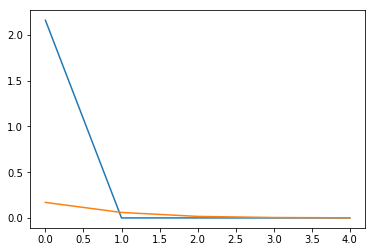

In [19]:
position_error = []
orientation_error = []

seed_joint_angles = np.array([0, 0, 0, 0])

#initialize positions = [x, y, z]
target_position = np.array([1, 2, 3])

#initialize orientations, quaternion = [w, x, y, z]
#quat_d = t3d.euler.euler2quat(0, 0, 0)#pi/4, pi/4)
quat_d = y[25,:] #this chooses an orientation in the range of our robot, something is messed up with the robot setup right now. confirm with VREP.

qs = seed_joint_angles.copy()
start = time.time()


#this algorithm implements the quaternion IK algorithm presented in 3.7.3 of Robotics: Modelling, Planning and Control
# to do: build full VREP robot and verify FK for position and orientation
# implement Selectively Damped Least squares
for i in range(5):
    current_position = robot.Tx(3, qs)
    quat_e = robot.Orientation_quaternion(3,qs)
    
    e_position = target_position - current_position
    
    #e_quaternion = t3d.quaternions.qmult(t3d.quaternions.qinverse(quat_d),quat_e)
    
    e_orientation = quat_e[0]*quat_d[1:] - quat_d[0]*quat_e[1:] - skew_symmetric(quat_d[1:])@quat_e[1:]
    
    qs = qs + 1*np.linalg.pinv(robot.J_position(3, qs))@e_position
    qs = qs + 1*np.linalg.pinv(robot.J_orientation(3, qs))@e_orientation
    
    position_error.append(np.sqrt(np.mean(e_position**2)))
    orientation_error.append(np.mean(e_orientation**2))#e_quaternion[1:]**2))
print((time.time()-start))

plt.plot(position_error)
plt.plot(orientation_error)

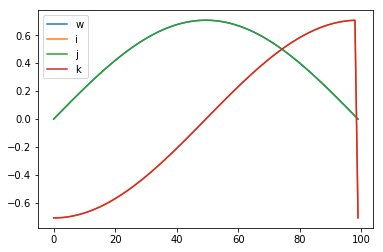

In [9]:
x = np.linspace(0,4*pi,num=100)
y = np.zeros((100,4))
for i in range(100):
    y[i,:] = robot.Orientation_quaternion(3,np.array([0,0,0,x[i]]))
    
plt.plot(y[:,0])
plt.plot(y[:,1])
plt.plot(y[:,2])
plt.plot(y[:,3])
plt.legend(['w', 'i', 'j', 'k'])

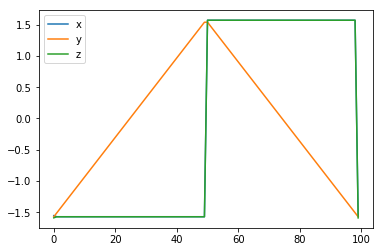

In [6]:
x = np.linspace(0,4*pi,num=100)
y = np.zeros((100,3))
for i in range(100):
    y[i,:] = robot.Orientation_euler(3,np.array([0,0,0,x[i]]))
    
plt.plot(y[:,0])
plt.plot(y[:,1])
plt.plot(y[:,2])
plt.legend(['x','y','z'])

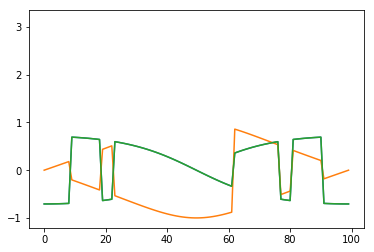

In [7]:
x = np.linspace(0,4*pi,num=100)
axis = np.zeros((100,3))
angle = np.zeros(100)
for i in range(100):
    axis[i,:], angle = robot.Orientation_axAngle(3,np.array([0,0,0,x[i]]))
    
plt.plot(axis[:,0])
plt.plot(axis[:,1])
plt.plot(axis[:,2])
plt.plot(angle)

In [9]:
robot.Orientation_euler(3,np.array([0,0,0,x[i]]))[0]

-1.5532604852838465

In [88]:
qs[3] = 0
quat_e = robot.Orientation_quaternion(3,qs)
e_position = target_position - current_position
e_quaternion = t3d.quaternions.qmult(t3d.quaternions.qinverse(quat_d),quat_e)
print(e_quaternion)

[ 1.21277616e-15 -7.07106781e-01  1.25607397e-15 -7.07106781e-01]
